## EXAMEN DATA SCIENCE 2
naam:  (vul in)  \
klas:  (vul in)  \
\
Voor je de file oplaadt, zorg ervoor dat alle cellen uitgevoerd zijn, zodat jouw resultaat ook weergegeven wordt!

### 0. Zet hier je imports

In [31]:
# imports
import pandas as pd
import numpy as np
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Input, Dense
from keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from simanneal import Annealer

### 1. Indexing

In [10]:
# a) 
print("Hij zal de cel met het getal 87 teruggeven.")

Hij zal de cel met het getal 87 teruggeven.


In [3]:
# b) 
df.iloc[3:5, 3]

### 2. Laad de 'Cars.csv' file

In [13]:
data = pd.read_csv('Cars.csv', sep=";", decimal=".")

### 3. Data Preparatie/Exploratie

In [14]:
# a
data_clean = data.dropna()

In [15]:
# b
model = data_clean['Model'].str.split(' ', n=1, expand=True)

In [44]:
# c
sum_price = data_clean['Price'].sum()
aantal_types = 5
berekening = sum_price / aantal_types
print("Gemiddelde prijs: " + berekening)

TypeError: can only concatenate str (not "numpy.float64") to str

Text(0.5, 1.0, 'Scatter Plot Prijs/PK')

Text(0.5, 0, 'Prijs')

Text(0, 0.5, 'Paardenkracht')

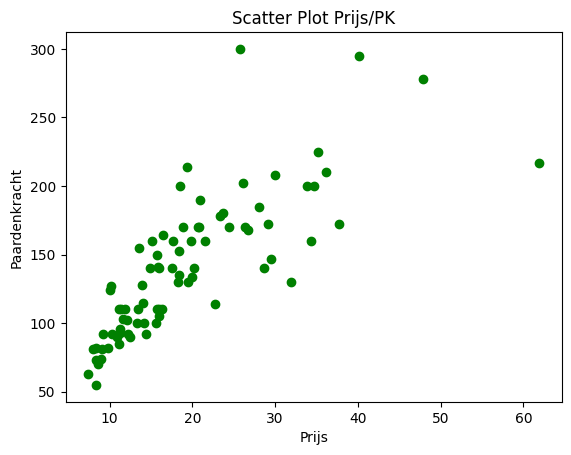

In [16]:
# d
prijs = data_clean['Price']
power = data_clean['Horsepower']

plt.scatter(prijs, power, color='green', marker='o')
plt.title('Scatter Plot Prijs/PK')
plt.xlabel('Prijs')
plt.ylabel('Paardenkracht')
plt.show()

### 4. Neurale netwerken regressie

#### a. Train en test dataset voor predictors en target feature

In [32]:
X = data_clean[['Cylinders', 'Horsepower', 'Passengers', 'Length']]

y = data_clean['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.06)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot.shape, y_test_one_hot.shape)


(4, 48) (77, 62)


#### b. definieer het model

In [33]:
inputs = Input(shape=(4, ))

x = Dense(128, activation='relu')(inputs) 
x = Dense(64, activation='relu')(x)

total_output_neurons = pd.unique(y).size
outputs = Dense(total_output_neurons, activation='linear')(x)  
model = Model(inputs, outputs, name="Price")  
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['r2_score'])

Model: "Price"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 74)             │         4,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,706 (53.54 KB)

 Trainable params: 13,706 (53.54 KB)

 Non-trainable params: 0 (0.00 B)

#### c. train het model

In [34]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - loss: 1107.2809 - r2_score: -2.8111 - val_loss: 850.1409 - val_r2_score: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1024.1986 - r2_score: -2.5252 - val_loss: 778.4914 - val_r2_score: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 952.0178 - r2_score: -2.2767 - val_loss: 714.6667 - val_r2_score: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 888.5916 - r2_score: -2.0584 - val_loss: 658.2811 - val_r2_score: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 832.2087 - r2_score: -1.8644 - val_loss: 608.6480 - val_r2_score: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 782.0202 - r2_score: -1.6916 - val_loss: 564.3338 - val_r2_score: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 737.0709 - r2_score: -1.5369 - val_loss: 525.3707 - val_r2_score: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 69

#### d. Maak een voorspelling

In [35]:
new_data = [[4, 1, 200.4, 190]]
predicted_outcome = model.predict(new_data)
print(predicted_outcome)

ValueError: Unrecognized data type: x=[[4, 1, 200.4, 190]] (of type <class 'list'>)

### 5. Random forest grid search

#### a. Dataset voor predictors en target feature

In [68]:
X_predictors = data_clean[['Price', 'Cylinders', 'Horsepower', 'Passengers', 'Length']]

y_target = data_clean['Type']

X_train, X_test, y_train, y_test = train_test_split(X_predictors, y_target, test_size=0.1, random_state=42)

#### b. Grid search

In [72]:
rf = RandomForestClassifier(n_estimators=15, max_depth=4, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

#### c. Scores voor de test dataset

In [80]:
y_test_pred = rf.predict(X_test)  

prec = precision_score(y_true=y_test, y_pred=y_test_pred, average='weighted')  
rec = recall_score(y_true=y_test, y_pred=y_test_pred, average='weighted')  
f1 = f1_score(y_true=y_test, y_pred=y_test_pred, average='weighted')

print(f'PREC : {prec:.3f} - REC : {rec:.3f} - F1 : {f1:.3f}')  
print(classification_report(y_true=y_test, y_pred=y_test_pred))

PREC : 0.778 - REC : 0.667 - F1 : 0.714
              precision    recall  f1-score   support

     Compact       0.00      0.00      0.00         1
       Large       1.00      1.00      1.00         1
     Midsize       1.00      0.75      0.86         4
       Small       0.50      0.50      0.50         2
      Sporty       1.00      1.00      1.00         1

    accuracy                           0.67         9
   macro avg       0.70      0.65      0.67         9
weighted avg       0.78      0.67      0.71         9



### 6. Simulated annealing

#### a. Optimale fiets

In [24]:
A_kwal = np.array([9, 8, 9, 9, 9, 8, 9, 9, 8, 9])
B_kwal = np.array([7, 6, 7, 8, 6, 6, 8, 8, 7, 6]) 
A_prijs = np.array([300, 250, 350, 200, 300, 320, 150, 250, 450, 160])
B_prijs = np.array([200, 100, 300, 150, 250, 220,  50, 180, 350,  20]) 

class BikeProblem(Annealer):
    def energy(self):
        B_onderdelen = self.state               # In de B_onderdelen array zijn alle geselecteerde B-onderdelen gelijk aan 1
        A_onderdelen = - (B_onderdelen - 1)     # In de A_onderdelen array zijn alle geselecteerde A-onderdelen gelijk aan 1

        totaal = B_prijs * A_prijs
        if totaal > 2500:
            totaal = 0
        else:
            totaal = (B_onderdelen + A_onderdelen)
        
        return -totaal

    def move(self):
        self.state[0] += np.random.normal(0, 0, 2)
        self.state[0] = np.clip(self.state[0], 0, 2)
        return

#### b. Prijs optimale fiets

In [25]:
solution = np.random.randint(0,2, size=2)
probleem = BikeProblem(solution)
probleem.anneal()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()